In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

def plot_selected_rows(csv_path, selected_rows):
    df = pd.read_csv(csv_path)
    df.set_index("dataset", inplace=True)
    
    # Extract numerical values from "mean ± std" format
    def extract_mean(value):
        return float(re.split(r"\s*±\s*", str(value))[0])
    
    def extract_std(value):
        return float(re.split(r"\s*±\s*", str(value))[1])
    
    factuality_levels = df.columns.tolist()
    factuality_levels = [float(level) for level in factuality_levels]  # Convert to float
    
    plt.figure(dpi=800)
    
    for dataset in selected_rows:
        if dataset in df.index:
            mean_values = df.loc[dataset].apply(extract_mean).values
            error  = df.loc[dataset].apply(extract_std).values
            # remove first word and _ before first _ in dataset name
            label = re.sub(r'^[^_]+_', '', dataset)
            if "LLM" in dataset:
                # plot with dashed line
                plt.errorbar(factuality_levels, mean_values, yerr=error, label=label, linewidth=2, linestyle="--")
            else:    
                plt.errorbar(factuality_levels, mean_values, yerr=error, label=label, linewidth=2)
    
    plt.xlabel("Target Factuality (1-alpha) (%)")
    plt.ylabel("Removal Rate (%)")
    #plt.title("Correctness vs Removed Data")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)

    filerow = csv_path.split("/")[-1].replace(".csv", "")
    rownames = "_".join(selected_rows)

    plt.savefig(f"{filerow}_{rownames}.png")
    plt.show()

# Example usage:
# plot_selected_rows("all_a=1.00_removal_conditional.csv", ["Popqa_RAG", "Hotpotqa_RAG"])


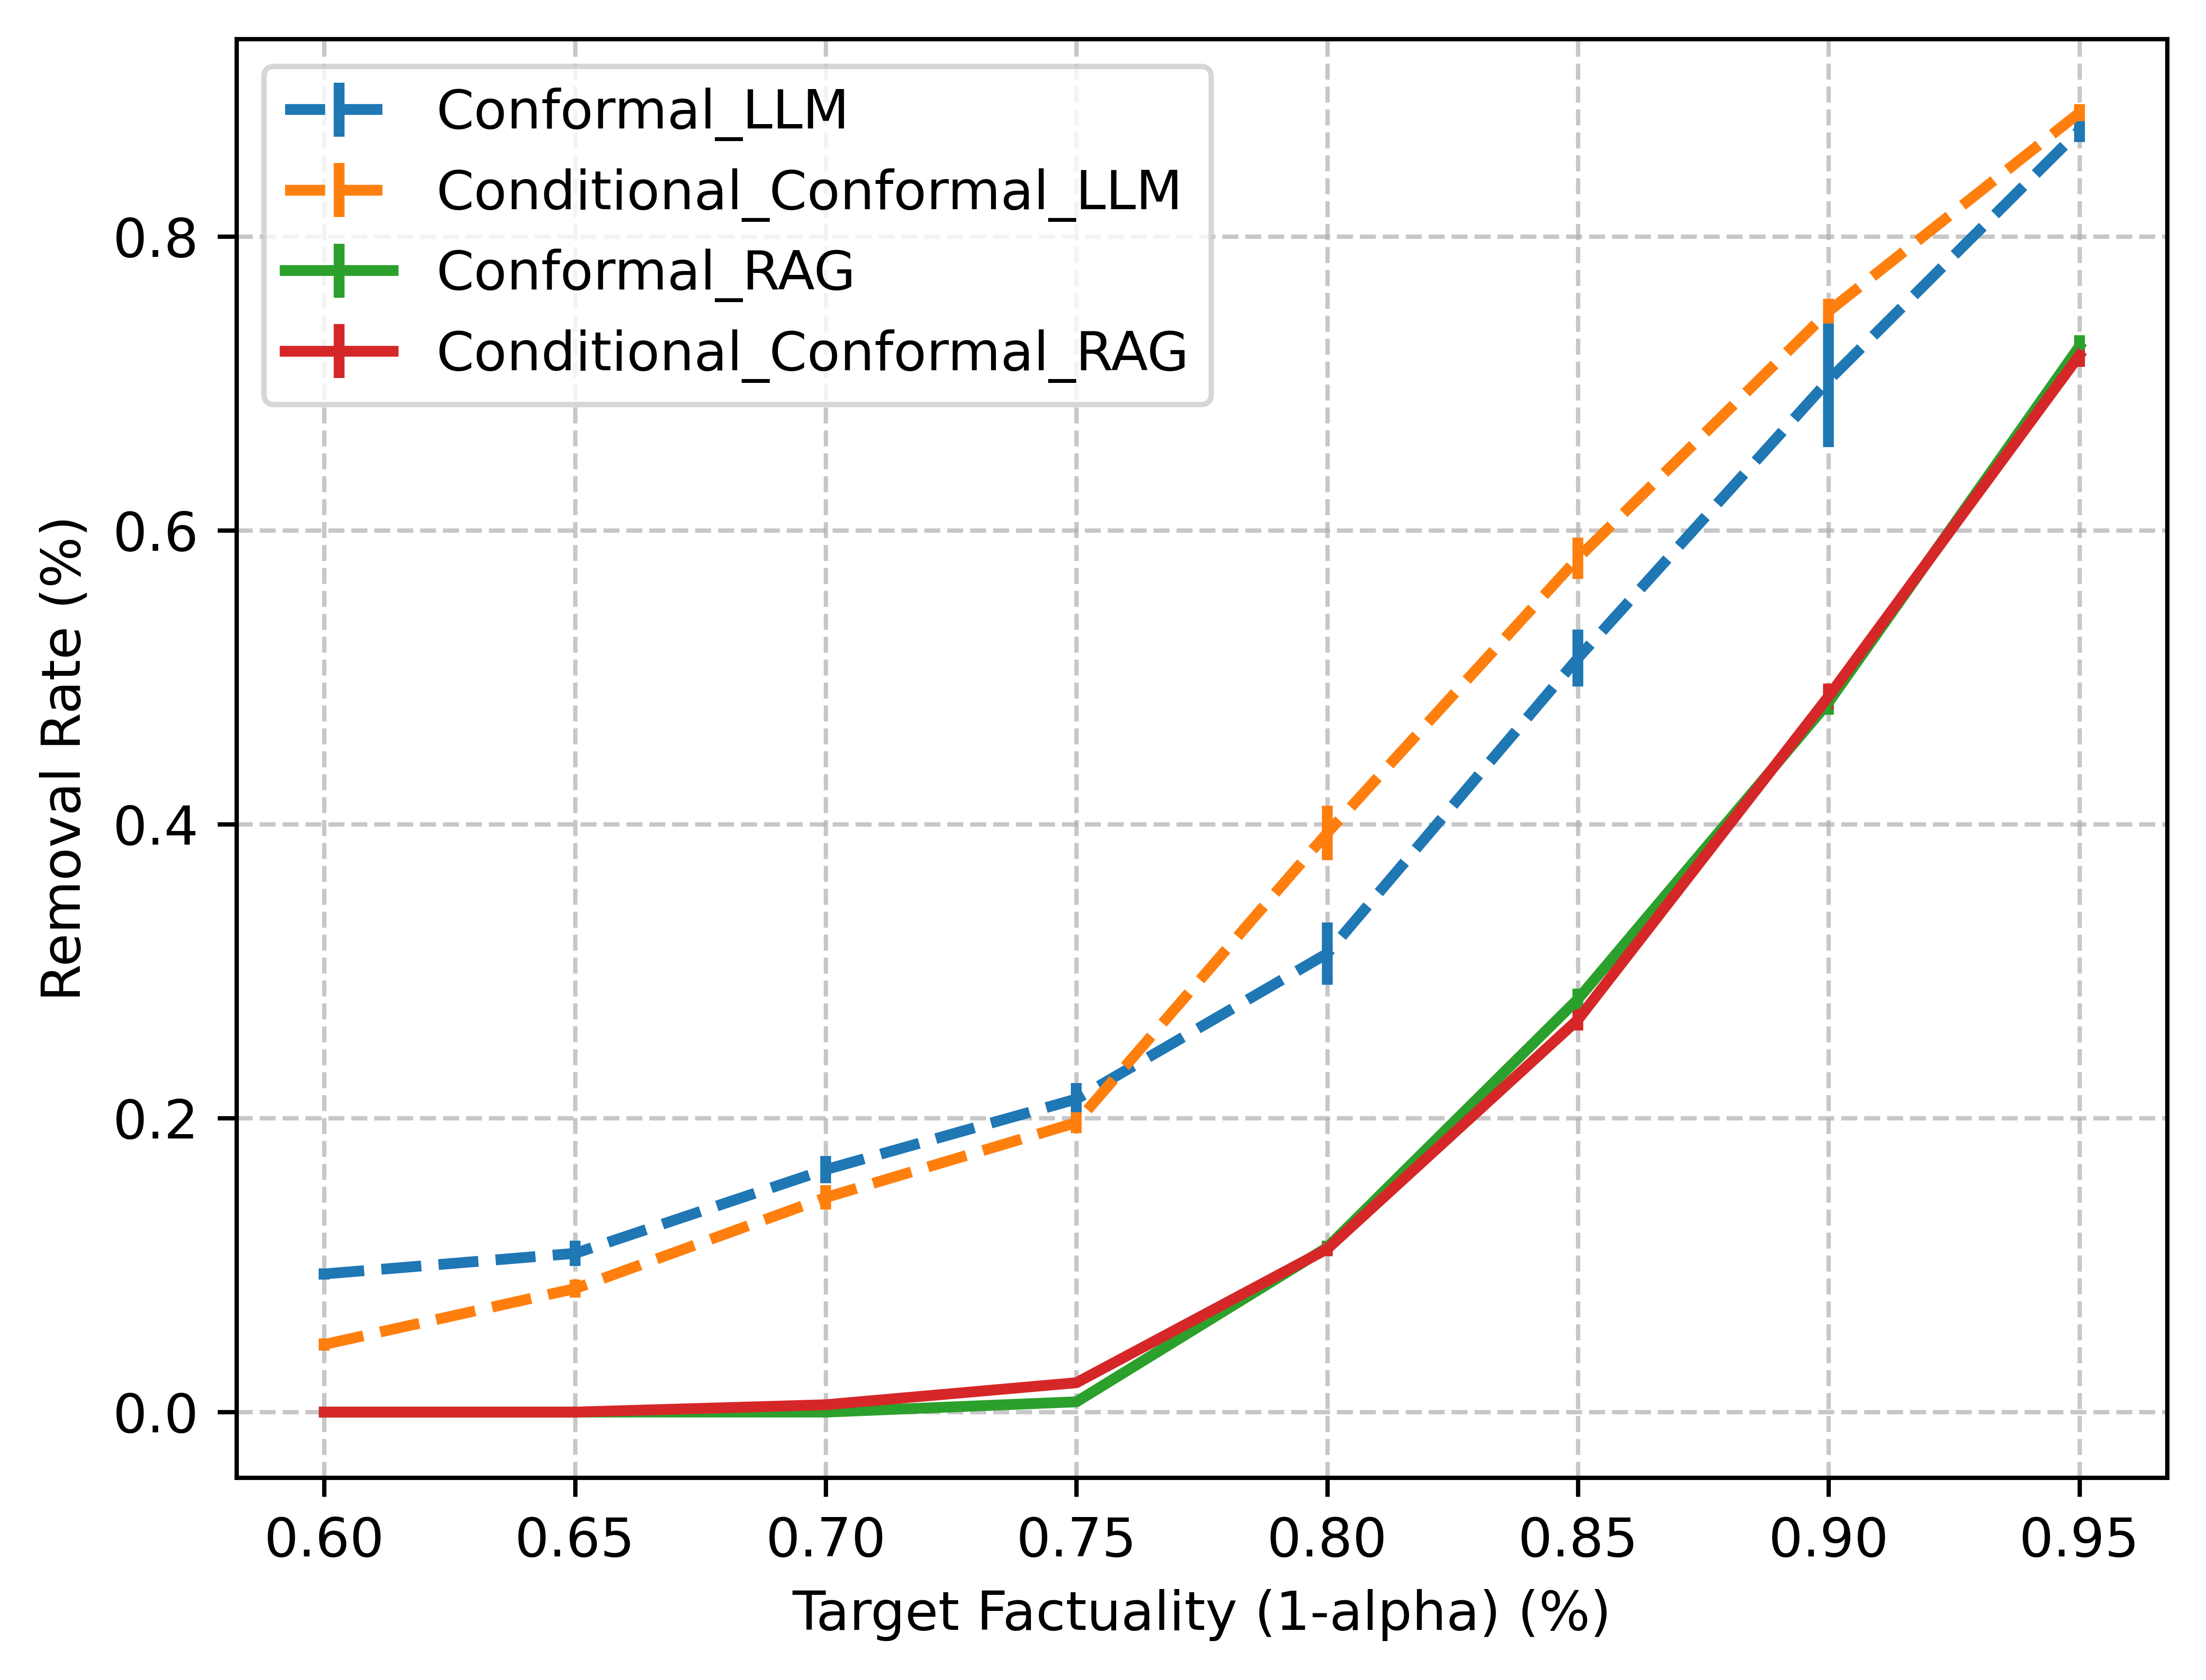

In [34]:
plot_selected_rows('/Users/naihefeng/Documents/2025/study/layer6/report/data/all_a=1.00_removal_conditional.csv', 
                   ["Medlfqav2_Conformal_LLM", "Medlfqav2_Conditional_Conformal_LLM", "Medlfqav2_Conformal_RAG", "Medlfqav2_Conditional_Conformal_RAG"])

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

def plot_selected_rows_factuality(csv_path, selected_rows):
    df = pd.read_csv(csv_path)
    df.set_index("dataset", inplace=True)
    
    # Extract numerical values from "mean ± std" format
    def extract_mean(value):
        return float(re.split(r"\s*±\s*", str(value))[0])
    
    def extract_std(value):
        return float(re.split(r"\s*±\s*", str(value))[1])
    
    factuality_levels = df.columns.tolist()
    factuality_levels = [float(level) for level in factuality_levels]  # Convert to float
    
    plt.figure(dpi=800)
    # Plot lower bound. adjust down slightly for better visualization
    y_values = [factual - 0.003 for factual in factuality_levels]
    plt.plot(
        factuality_levels, y_values, "--", color="gray", linewidth=2, label="1-alpha lower bounds"
    )
    for dataset in selected_rows:
        if dataset in df.index:
            mean_values = df.loc[dataset].apply(extract_mean).values
            error  = df.loc[dataset].apply(extract_std).values
            # remove first word and _ before first _ in dataset name
            label = re.sub(r'^[^_]+_', '', dataset)
            if "LLM" in dataset:
                # plot with dashed line
                plt.plot(factuality_levels, mean_values, "--", label=label, linewidth=2)
            else:    
                plt.plot(factuality_levels, mean_values, label=label, linewidth=2)
    
    plt.xlabel("Target Factuality (1-alpha) (%)")
    plt.ylabel("Empirical Factuality (%)")
    #plt.title("Correctness vs Removed Data")
    plt.legend()


    filerow = csv_path.split("/")[-1].replace(".csv", "")
    rownames = "_".join(selected_rows)

    plt.savefig(f"{filerow}_{rownames}_factuality.png")
    plt.show()

# Example usage:
# plot_selected_rows("all_a=1.00_removal_conditional.csv", ["Popqa_RAG", "Hotpotqa_RAG"])


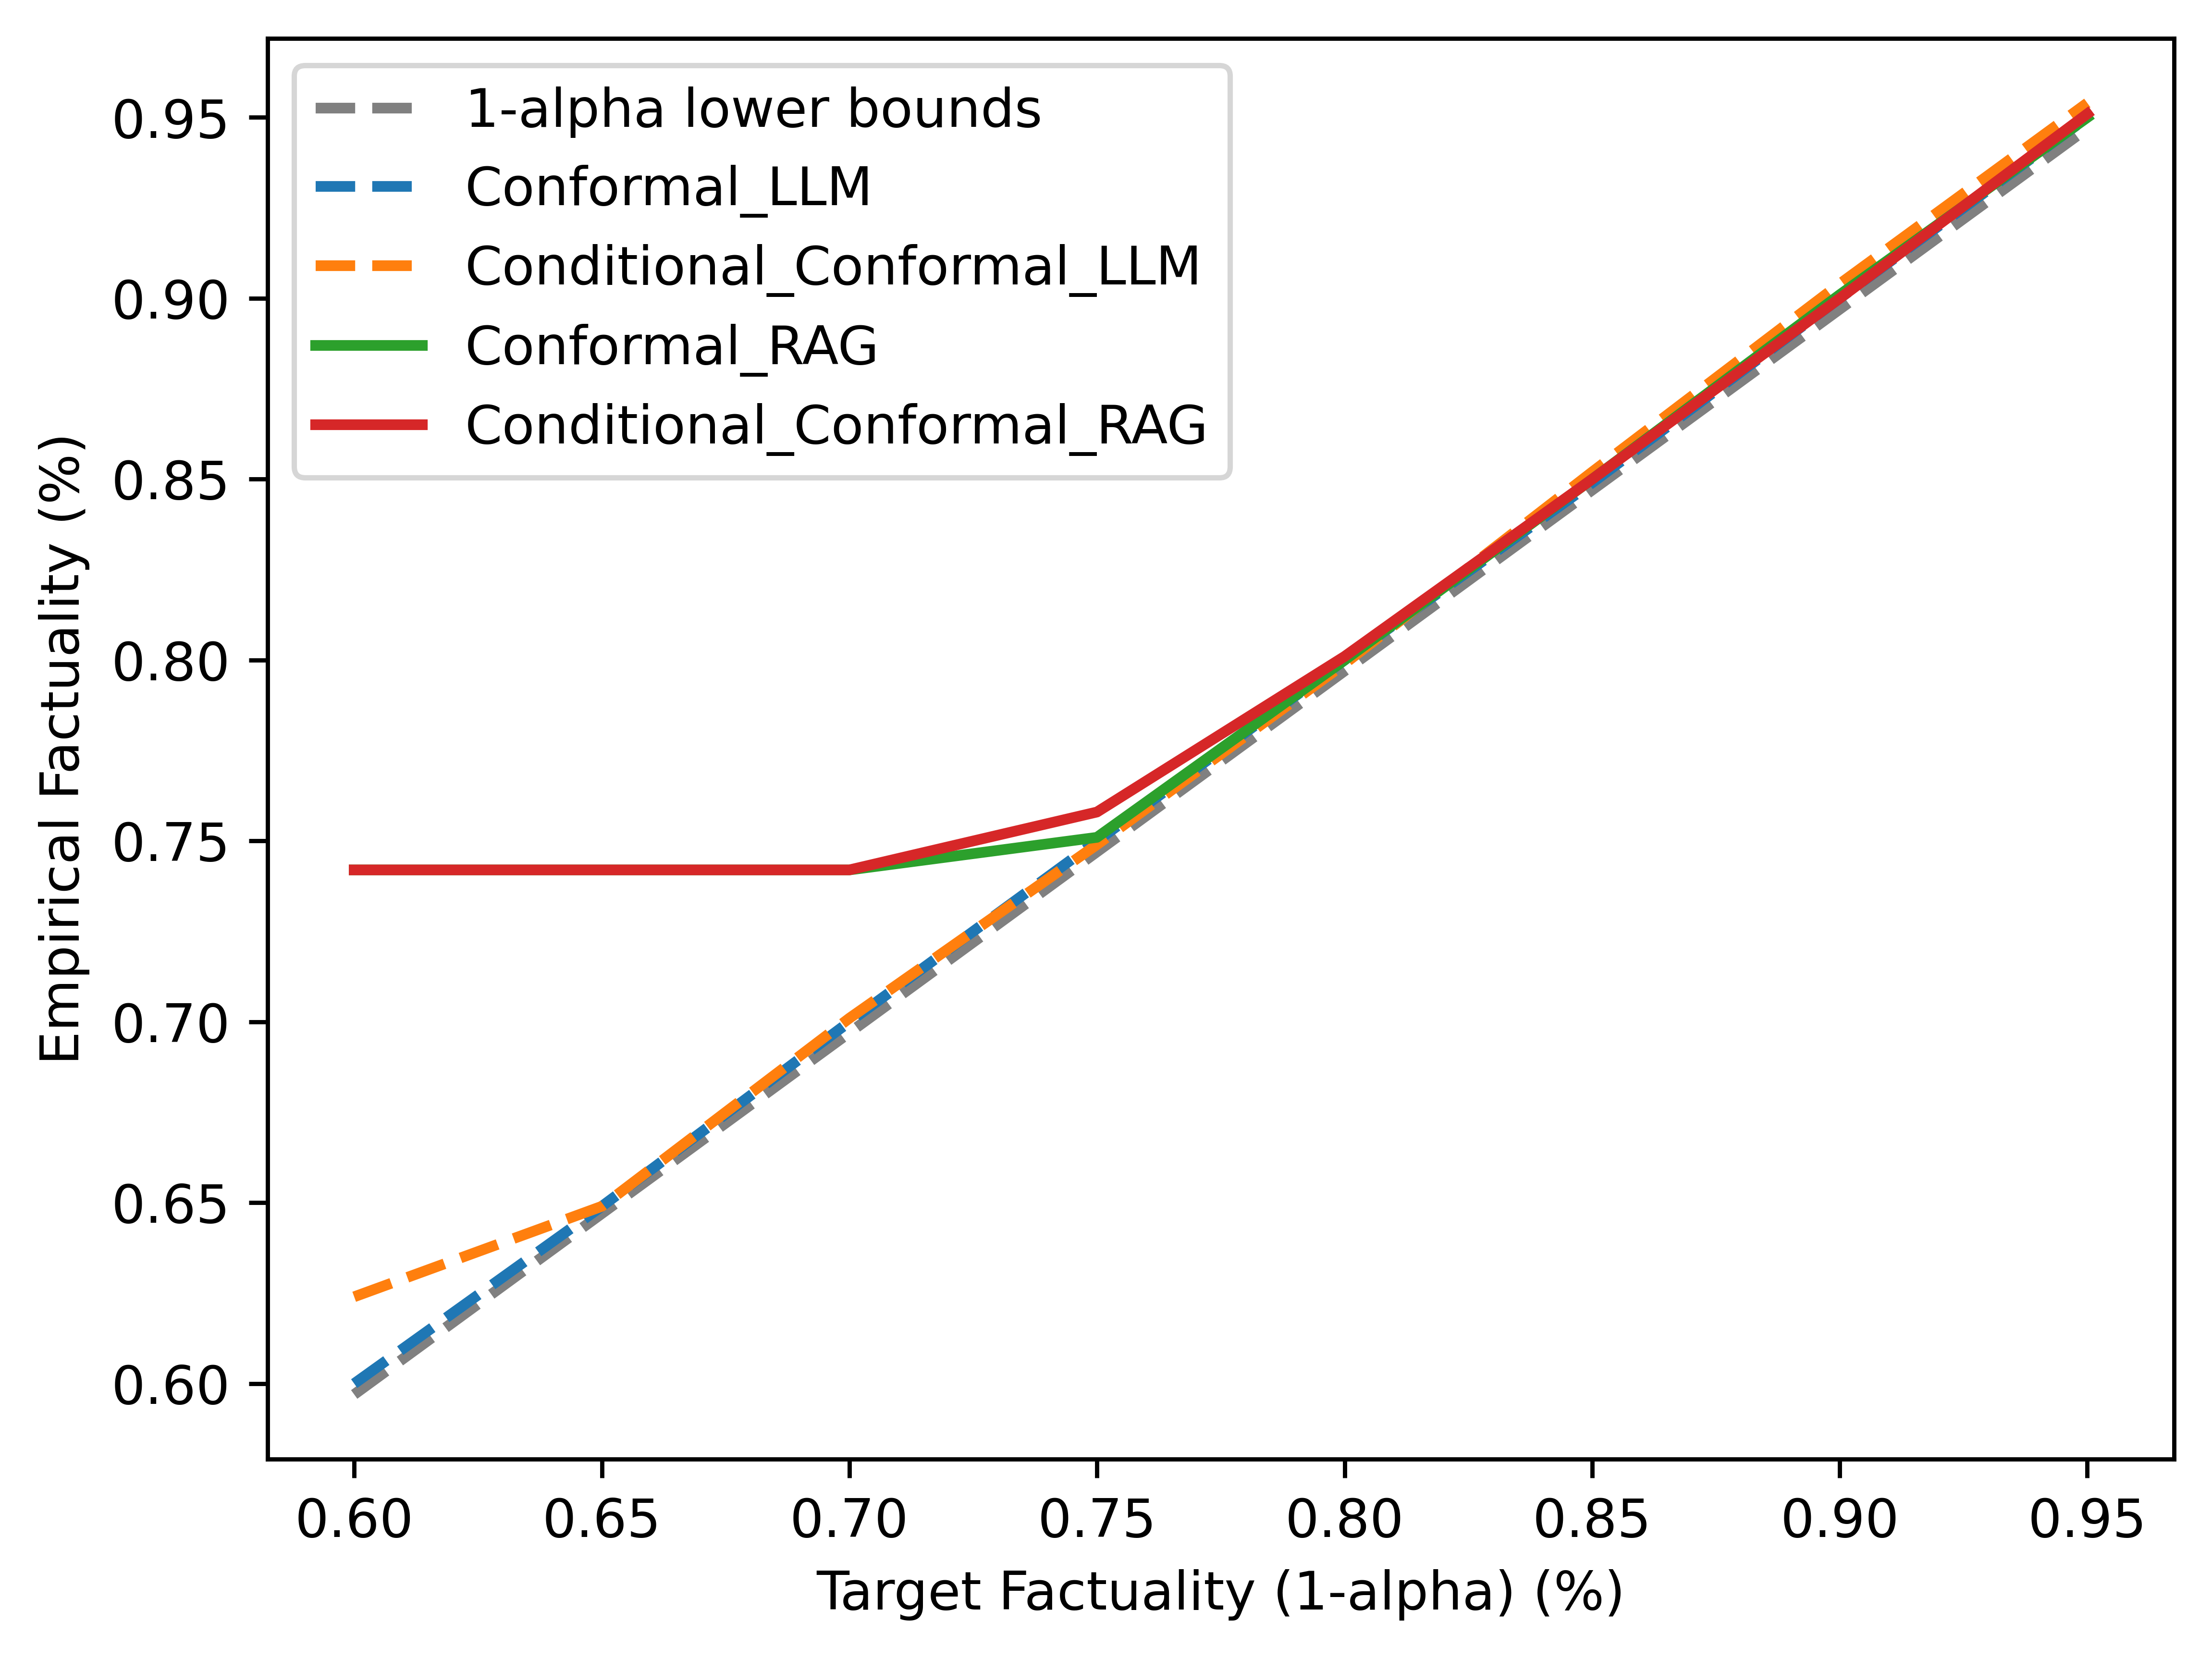

In [27]:
plot_selected_rows_factuality('/Users/naihefeng/Documents/2025/study/layer6/report/data/factuality.csv', 
                   ["Medlfqav2_Conformal_LLM", "Medlfqav2_Conditional_Conformal_LLM", "Medlfqav2_Conformal_RAG", "Medlfqav2_Conditional_Conformal_RAG"])